# Titanic: Machine Learning from Disaster

The goal is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [4]:
import pandas as pd

train_full_data = pd.read_csv('data/train.csv')
test_full_data = pd.read_csv('data/test.csv')

The attributes represents the following information:
* **Survived**: 0 if the passenger did not survive, 1 if passenger did survive.
* **Pclass**: passenger class
* **SibSp**: # of siblings & spouses of the passenger aboard the Titanic.
* **Parch**: # of children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [10]:
train_full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the dataset we see that there are null values for *Age*, *Cabin*, and *Embarked*.

## Getting Insight into Data

We create pivot tables to get useful insight in the data.

In [45]:
train_full_data[['Fare', 'Survived']].groupby(['Survived']).mean().sort_values(by='Fare', ascending=False)

,Fare
Survived,
1,48.395408
0,22.117887


In [44]:
train_full_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [47]:
train_full_data[['Pclass', 'Fare']].groupby(['Pclass']).mean().sort_values(by='Fare', ascending=False)

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [46]:
train_full_data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


## Data Visualization

To get a better understanding of the relationship between variables, we plot visualizations.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

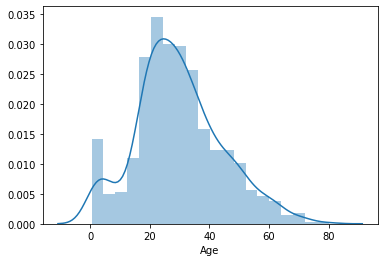

In [13]:
sns.distplot(train_full_data['Age'])

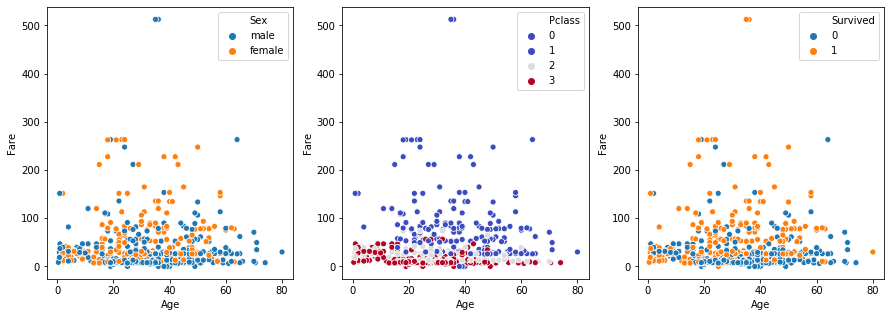

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x = "Age", y = "Fare", hue="Sex", data = train_full_data)

plt.subplot(1, 3, 2)
sns.scatterplot(x = "Age", y = "Fare", hue="Pclass", palette="coolwarm", data = train_full_data)

plt.subplot(1, 3, 3)
sns.scatterplot(x = "Age", y = "Fare", hue="Survived", data = train_full_data)

## Preparing the Data

In [ ]:
import re